# Vietnamese ID card Detection and Alignment

Reference: https://github.com/xingyizhou/CenterNet

In [1]:
!nvidia-smi 

Thu Dec 17 13:56:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get code from drive

copy to Colab's memory

In [2]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
!cp -R CenterNet /content/Work

^C


In [ ]:
%cd
%cd /content/Work/CenterNet/data/coco
!unzip train2017.zip
!unzip val2017.zip

Use data in Drive immediately

## Setup enviroment

In [2]:
%cd 

/root


In [3]:
!echo $PYTHONPATH

/env/python


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [5]:
!conda --version
!python --version

conda 4.5.4
Python 3.6.5 :: Anaconda, Inc.


In [ ]:
!conda update -n base conda

In [ ]:
!conda create --name CenterNet python=3.6

In [8]:
!source activate CenterNet

In [ ]:
!conda install pytorch=0.4.1 cuda92 -c pytorch

In [ ]:
!conda install pytorch=0.4.1 torchvision -c pytorch

In [ ]:
!conda install ipykernel

## Install requirements and setup code

In [12]:
%cd
%cd /content/drive/MyDrive/Colab Notebooks/CenterNet/CenterNet
#%cd /content/Work/CenterNet if trainning 

/root
/content/drive/MyDrive/Colab Notebooks/CenterNet/CenterNet


In [13]:
!pip install -r requirements.txt

     |████████████████████████████████| 2.0 MB 8.3 MB/s 
     |████████████████████████████████| 11.6 MB 28 kB/s 
     |████████████████████████████████| 1.1 MB 80.1 MB/s 
     |████████████████████████████████| 67 kB 8.4 MB/s 
     |████████████████████████████████| 3.2 MB 23.8 MB/s 
     |████████████████████████████████| 25.3 MB 139 kB/s 
     |████████████████████████████████| 49.5 MB 74 kB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6350 sha256=71ac6a585716501d69999bd27e83c9f408a6b75e84e1ffa5de1c86b2ff3b0e6d
  Stored in directory: /root/.cache/pip/wheels/88/96/68/c2be18e7406804be2e593e1c37845f2dd20ac2ce1381ce40b0
  Created wheel for progress: filename=progress-1.5-py3-none-any.whl size=8073 sha256=5337dbda022f0e7eaf6400dc237f068fff69ec79c914ab317b4c66a03883e8a4
  Stored in directory: /root/.cache/pip/wheels/4c/ff/85/0cabf2cb317421028ef98853ae5c8d84c31f3e4e11862ea977
Successfully built easydi

In [1]:
#%cd /content/Work/cocoapi/PythonAPI
%cd /content/drive/MyDrive/Colab Notebooks/CenterNet/cocoapi/PythonAPI

/content/drive/MyDrive/Colab Notebooks/CenterNet/cocoapi/PythonAPI


In [ ]:
!make

In [ ]:
!python setup.py install --user

In [4]:
%cd ..
%cd ..

/content/drive/My Drive/Colab Notebooks/CenterNet/cocoapi
/content/drive/My Drive/Colab Notebooks/CenterNet


In [5]:
%cd CenterNet/src/lib/models/networks/DCNv2

/content/drive/My Drive/Colab Notebooks/CenterNet/CenterNet/src/lib/models/networks/DCNv2


In [6]:
!chmod 755 make.sh

In [ ]:
!./make.sh

In [8]:
%cd ..
%cd ..
%cd ..
%cd ..

/content/drive/My Drive/Colab Notebooks/CenterNet/CenterNet/src/lib/models/networks
/content/drive/My Drive/Colab Notebooks/CenterNet/CenterNet/src/lib/models
/content/drive/My Drive/Colab Notebooks/CenterNet/CenterNet/src/lib
/content/drive/My Drive/Colab Notebooks/CenterNet/CenterNet/src


## Training

Train DLA-34

In [ ]:
!python main.py multi_pose --exp_id coco_dla_cmnd --batch_size 10 --num_epochs 100 --dataset coco_hp --master_batch 15 --lr 1.25e-4  --gpus 0

Fix size testing.
training chunk_sizes: [15]
The output will be saved to  /content/Work/CenterNet/src/lib/../../exp/multi_pose/coco_dla_cmnd
Check Namespace(K=100, aggr_weight=0.0, agnostic_ex=False, arch='dla_34', aug_ddd=0.5, aug_rot=0, batch_size=10, cat_spec_wh=False, center_thresh=0.1, chunk_sizes=[15], data_dir='/content/Work/CenterNet/src/lib/../../data', dataset='coco_hp', debug=0, debug_dir='/content/Work/CenterNet/src/lib/../../exp/multi_pose/coco_dla_cmnd/debug', debugger_theme='white', demo='', dense_hp=False, dense_wh=False, dep_weight=1, dim_weight=1, down_ratio=4, eval_oracle_dep=False, eval_oracle_hm=False, eval_oracle_hmhp=False, eval_oracle_hp_offset=False, eval_oracle_kps=False, eval_oracle_offset=False, eval_oracle_wh=False, exp_dir='/content/Work/CenterNet/src/lib/../../exp/multi_pose', exp_id='coco_dla_cmnd', fix_res=True, flip=0.5, flip_test=False, gpus=[0], gpus_str='0', head_conv=256, hide_data_time=False, hm_hp=True, hm_hp_weight=1, hm_weight=1, hp_weight=1, i

Train ResNet-18

In [ ]:
!python main.py multi_pose --exp_id hg_cmnd --arch res_18 --batch_size 16 --num_epochs 60 --dataset coco_hp --master_batch 15 --lr 1.25e-4  --gpus 0

Fix size testing.
training chunk_sizes: [15]
The output will be saved to  /content/Work/CenterNet/src/lib/../../exp/multi_pose/hg_cmnd
Check Namespace(K=100, aggr_weight=0.0, agnostic_ex=False, arch='res_18', aug_ddd=0.5, aug_rot=0, batch_size=16, cat_spec_wh=False, center_thresh=0.1, chunk_sizes=[15], data_dir='/content/Work/CenterNet/src/lib/../../data', dataset='coco_hp', debug=0, debug_dir='/content/Work/CenterNet/src/lib/../../exp/multi_pose/hg_cmnd/debug', debugger_theme='white', demo='', dense_hp=False, dense_wh=False, dep_weight=1, dim_weight=1, down_ratio=4, eval_oracle_dep=False, eval_oracle_hm=False, eval_oracle_hmhp=False, eval_oracle_hp_offset=False, eval_oracle_kps=False, eval_oracle_offset=False, eval_oracle_wh=False, exp_dir='/content/Work/CenterNet/src/lib/../../exp/multi_pose', exp_id='hg_cmnd', fix_res=True, flip=0.5, flip_test=False, gpus=[0], gpus_str='0', head_conv=64, hide_data_time=False, hm_hp=True, hm_hp_weight=1, hm_weight=1, hp_weight=1, input_h=-1, input_re

Train HourGlass

In [ ]:
!python main.py multi_pose --exp_id hg_cmnd --arch hourglass --batch_size 8 --num_epochs 80 --dataset coco_hp --master_batch 15 --lr 1.25e-4  --gpus 0

Fix size testing.
training chunk_sizes: [15]
The output will be saved to  /content/Work/CenterNet/src/lib/../../exp/multi_pose/hg_cmnd
Check Namespace(K=100, aggr_weight=0.0, agnostic_ex=False, arch='hourglass', aug_ddd=0.5, aug_rot=0, batch_size=8, cat_spec_wh=False, center_thresh=0.1, chunk_sizes=[15], data_dir='/content/Work/CenterNet/src/lib/../../data', dataset='coco_hp', debug=0, debug_dir='/content/Work/CenterNet/src/lib/../../exp/multi_pose/hg_cmnd/debug', debugger_theme='white', demo='', dense_hp=False, dense_wh=False, dep_weight=1, dim_weight=1, down_ratio=4, eval_oracle_dep=False, eval_oracle_hm=False, eval_oracle_hmhp=False, eval_oracle_hp_offset=False, eval_oracle_kps=False, eval_oracle_offset=False, eval_oracle_wh=False, exp_dir='/content/Work/CenterNet/src/lib/../../exp/multi_pose', exp_id='hg_cmnd', fix_res=True, flip=0.5, flip_test=False, gpus=[0], gpus_str='0', head_conv=64, hide_data_time=False, hm_hp=True, hm_hp_weight=1, hm_weight=1, hp_weight=1, input_h=-1, input_

## Evaluate model

DLA benchmark

In [ ]:
!python test.py multi_pose --exp_id dla --keep_res --dataset coco_hp --load_model ../models/cmnd_front_55epochs.pth --flip_test

NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
Keep resolution testing.
training chunk_sizes: [32]
The output will be saved to  /content/Work/CenterNet/src/lib/../../exp/multi_pose/dla
heads {'hm': 1, 'wh': 2, 'hps': 34, 'reg': 2, 'hm_hp': 17, 'hp_offset': 2}
Namespace(K=100, aggr_weight=0.0, agnostic_ex=False, arch='dla_34', aug_ddd=0.5, aug_rot=0, batch_size=32, cat_spec_wh=False, center_thresh=0.1, chunk_sizes=[32], data_dir='/content/Work/CenterNet/src/lib/../../data', dataset='coco_hp', debug=0, debug_dir='/content/Work/CenterNet/src/lib/../../exp/multi_pose/dla/debug', debugger_theme='white', demo='', dense_hp=False, dense_wh=False, dep_weight=1, dim_weight=1, down_ratio=4, eval_oracle_dep=False, eval_oracle_hm=False, eval_oracle_hmhp=False, eval_oracle_hp_offset=False, eval_oracle_kps=False, eval_oracle_offset=False, eval_oracle_wh=False, exp_dir='/content/Work/Ce

ResNet-18 Benchmark

In [ ]:
!python test.py multi_pose --exp_id res --arch res_18 --keep_res --dataset coco_hp --load_model ../models/res18_cmnd_41epochs.pth --flip_test

NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
Keep resolution testing.
training chunk_sizes: [32]
The output will be saved to  /content/Work/CenterNet/src/lib/../../exp/multi_pose/res
heads {'hm': 1, 'wh': 2, 'hps': 34, 'reg': 2, 'hm_hp': 17, 'hp_offset': 2}
Namespace(K=100, aggr_weight=0.0, agnostic_ex=False, arch='res_18', aug_ddd=0.5, aug_rot=0, batch_size=32, cat_spec_wh=False, center_thresh=0.1, chunk_sizes=[32], data_dir='/content/Work/CenterNet/src/lib/../../data', dataset='coco_hp', debug=0, debug_dir='/content/Work/CenterNet/src/lib/../../exp/multi_pose/res/debug', debugger_theme='white', demo='', dense_hp=False, dense_wh=False, dep_weight=1, dim_weight=1, down_ratio=4, eval_oracle_dep=False, eval_oracle_hm=False, eval_oracle_hmhp=False, eval_oracle_hp_offset=False, eval_oracle_kps=False, eval_oracle_offset=False, eval_oracle_wh=False, exp_dir='/content/Work/Ce

## Demo

In [9]:
%cd
%cd /content/drive/MyDrive/Colab Notebooks/CenterNet/CenterNet/src

/root
/content/drive/MyDrive/Colab Notebooks/CenterNet/CenterNet/src


In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def perspective_transoform(image, source_points):
    dest_points = np.float32([[0,0], [3000,0], [3000,1800], [0,1800]])
    M = cv2.getPerspectiveTransform(source_points, dest_points)
    dst = cv2.warpPerspective(image, M, (3000, 1800))
    plt.subplots(figsize = (10, 10))
    plt.imshow(dst[:, :, ::-1])
    plt.axis('off')
    cv2.imwrite('final_result.jpg', dst)

In [12]:
!python demo.py multi_pose --demo Test_images/test_muilticard2.jpg --load_model ../models/dla_cmnd_55epochs.pth

NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/drive/My Drive/Colab Notebooks/CenterNet/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 34, 'reg': 2, 'hm_hp': 17, 'hp_offset': 2}
test <class 'detectors.multi_pose.MultiPoseDetector'>
Creating model...
Downloading: "http://dl.yf.io/dla/models/imagenet/dla34-ba72cf86.pth" to /root/.torch/models/dla34-ba72cf86.pth
100% 63228658/63228658 [00:00<00:00, 74299364.33it/s]
loaded ../models/dla_cmnd_55epochs.pth, epoch 56
test <detectors.multi_pose.MultiPoseDetector object at 0x7f08075e84a8>
In debugger, line 215, test
Final Point
[[281  14]
 [463  16]
 [460 131]
 [279 127]
 [370  72]]
In debugger, line 215, test
Final Point
[[289 190]
 [480 192]
 [478 312]
 [286 310]
 [383 250]]
In debugger, line 215, test
Final Point


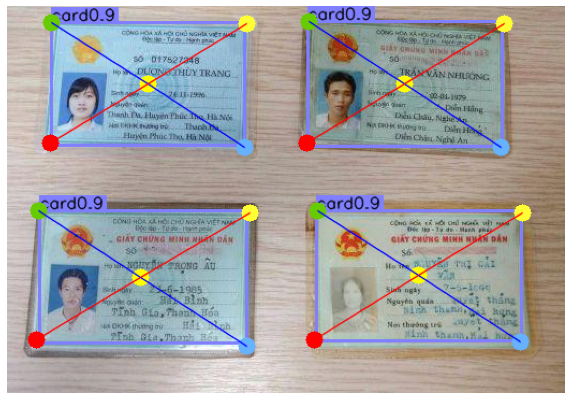

In [13]:
img = cv2.imread('multi_pose.png')
fig = plt.subplots(figsize = (10, 10))
plt.axis("off")
plt.imshow(img[:,:,::-1])

In [14]:
#!python demo.py multi_pose --demo Test_images/test_me.jpg --arch res_18 --load_model ../models/res18_cmnd_41epochs.pth
!python demo.py multi_pose --demo Test_images/testme2.jpg --load_model ../models/dla_cmnd_55epochs.pth

NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/drive/My Drive/Colab Notebooks/CenterNet/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 34, 'reg': 2, 'hm_hp': 17, 'hp_offset': 2}
test <class 'detectors.multi_pose.MultiPoseDetector'>
Creating model...
loaded ../models/dla_cmnd_55epochs.pth, epoch 56
test <detectors.multi_pose.MultiPoseDetector object at 0x7f9c14781898>
In debugger, line 215, test
Final Point
[[ 712 1046]
 [4968  521]
 [5396 3125]
 [1143 3733]
 [3040 2101]]
tot 2.592s |load 2.464s |pre 0.090s |net 0.025s |dec 0.002s |post 0.009s |merge 0.000s |


In [15]:
#!python demo.py multi_pose --demo Test_images/testme2.jpg --load_model ../models/model_cmnd.pth

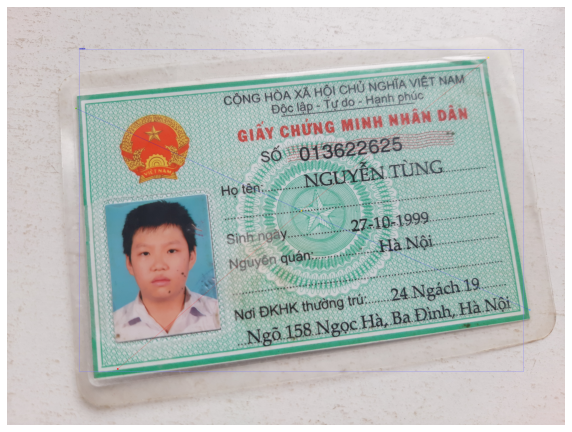

In [17]:
img = cv2.imread('multi_pose.png')
fig = plt.subplots(figsize = (10, 10))
plt.axis("off")
plt.imshow(img[:,:,::-1])

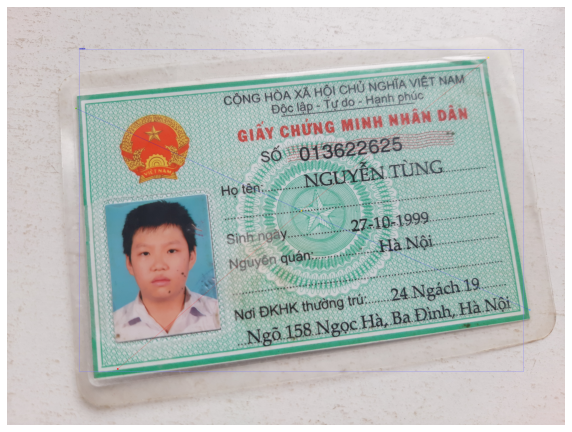

In [18]:
img = cv2.imread('multi_pose.png')
fig = plt.subplots(figsize = (10, 10))
plt.axis('off')
plt.imshow(img[:,:,::-1])

In [19]:
label_boxes = { 'top_left': (712, 1046),
                'top_right': (4968, 521),
                'bottom_right': (5396, 3125),
                'bottom_left': (1143, 3733)}

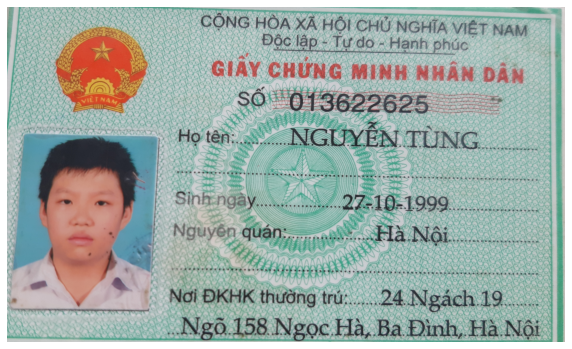

In [20]:
sample = cv2.imread('Test_images/testme2.jpg')
source_points = np.float32([
    label_boxes['top_left'], label_boxes['top_right'], label_boxes['bottom_right'], label_boxes['bottom_left']
])
perspective_transoform(sample, source_points)

In [ ]:
!python demo.py multi_pose --demo Test_images/test_muilticard1.jpg --load_model ../models/dla_cmnd_55epochs.pth

NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/drive/My Drive/Colab Notebooks/CenterNet/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 34, 'reg': 2, 'hm_hp': 17, 'hp_offset': 2}
test <class 'detectors.multi_pose.MultiPoseDetector'>
Creating model...
loaded ../models/dla_cmnd_55epochs.pth, epoch 56
test <detectors.multi_pose.MultiPoseDetector object at 0x7f769395f860>
In debugger, line 215, test
Final Point
[[ 44 198]
 [319 207]
 [309 386]
 [ 36 370]
 [174 290]]
In debugger, line 215, test
Final Point
[[348 211]
 [623 211]
 [622 386]
 [346 383]
 [485 298]]
tot 0.657s |load 0.523s |pre 0.096s |net 0.025s |dec 0.003s |post 0.010s |merge 0.000s |


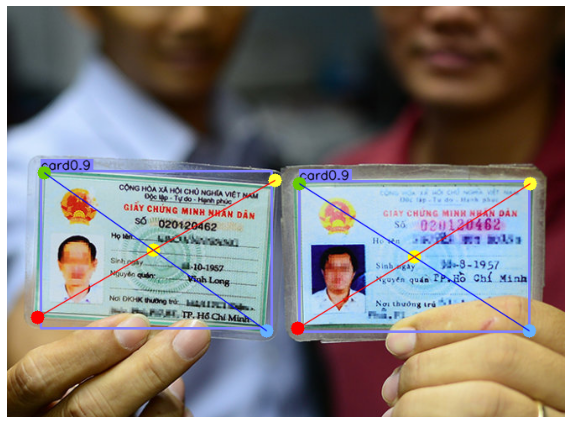

In [ ]:
img = cv2.imread('multi_pose.png')
fig = plt.subplots(figsize = (10, 10))
plt.axis('off')
plt.imshow(img[:,:,::-1])

# OCR

## Text Detection with CRAFT

In [ ]:
!pip install scikit-image==0.14.2

     |████████████████████████████████| 25.3 MB 88 kB/s 
     |████████████████████████████████| 4.4 MB 40.6 MB/s 
     |████████████████████████████████| 1.6 MB 86.9 MB/s 
     |████████████████████████████████| 848 kB 71.3 MB/s 
     |████████████████████████████████| 269 kB 76.5 MB/s 
     |████████████████████████████████| 55 kB 5.4 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=393806 sha256=6424e1d7f7921dccbf038622df89f256a10b532178e904d4ac391526b6877304
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built pyyaml


In [ ]:
%cd 
%cd /content/drive/MyDrive/Colab Notebooks/CRAFT-pytorch

/root
/content/drive/MyDrive/Colab Notebooks/CRAFT-pytorch


In [ ]:
!python test.py

Loading weights from checkpoint (weights/craft_mlt_25k.pth)
0 data/final_result.jpg
elapsed time : 0.6300277709960938s


In [ ]:
!ls

basenet		figures        __pycache__	 result      weights
craft.py	file_utils.py  README.md	 sample
craft_utils.py	imgproc.py     refinenet.py	 sample.zip
data		LICENSE        requirements.txt  test.py


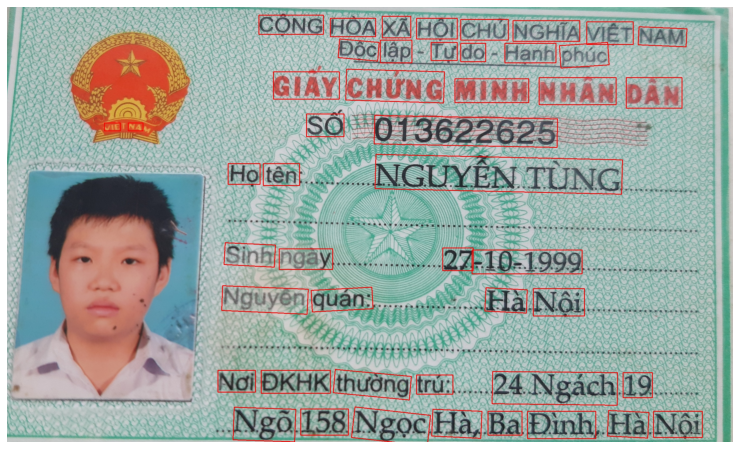

In [ ]:
image = cv2.imread('result/res_final_result.jpg')
plt.subplots(figsize = (13, 13))
plt.axis('off')
plt.imshow(image[:, :, ::-1])

In [ ]:
boxes = []

In [ ]:
with open('result/res_final_result.txt') as f:
    for line in f:
        inner_list = [elt.strip() for elt in line.split(',')]
        # in alternative, if you need to use the file content as numbers
        # inner_list = [int(elt.strip()) for elt in line.split(',')]
        boxes.append(inner_list)

In [ ]:
for ls in boxes:
  for i in range(len(ls)):
    ls[i] = int(ls[i])

In [ ]:
boxes[:5]

[[867, 31, 1089, 31, 1089, 97, 867, 97],
 [1292, 35, 1390, 35, 1390, 109, 1292, 109],
 [1113, 42, 1269, 42, 1269, 105, 1113, 105],
 [1410, 42, 1550, 42, 1550, 113, 1410, 113],
 [1562, 46, 1726, 46, 1726, 117, 1562, 117]]

In [ ]:
points = []
for ls in boxes:
  top_left = [ls[0], ls[1]]
  top_right = [ls[2], ls[3]]
  bottom_right = [ls[4], ls[5]]
  bottom_left = [ls[6], ls[7]]
  points.append([top_left, top_right, bottom_left, bottom_right])

In [ ]:
points[20:25]

[[[1266, 376], [1895, 388], [1264, 474], [1894, 486]],
 [[335, 402], [390, 402], [335, 429], [390, 429]],
 [[417, 402], [468, 402], [417, 429], [468, 429]],
 [[1270, 510], [2119, 529], [1267, 628], [2116, 647]],
 [[761, 542], [871, 542], [761, 613], [871, 613]]]

In [ ]:
image.shape

(1500, 2500, 3)

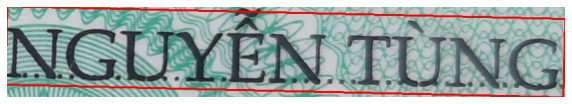

In [ ]:
cropped = image[510:647, 1270:2119, :]
plt.subplots(figsize = (10, 10))
plt.axis('off')
plt.imshow(cropped[:, :, ::-1])

In [ ]:
cv2.imwrite('sample/myname.jpg', cropped)

True

## OCR with VietOCR

In [ ]:
!pip install --quiet vietocr==0.3.2

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

ModuleNotFoundError: ignored